In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from scipy.stats import normaltest
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import missingno as msno


sns.set_theme(style="darkgrid", context= "paper")

In [2]:
HMDA_raw = pd.read_csv("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/raw/HMDA_SD_LA_UT_TX_MT/state_SD-LA-UT-TX-MT_races_White-Black or African American_ethnicities_Not Hispanic or Latino.csv")

C:\Users\Hauke\AppData\Local\Temp\ipykernel_176880\3624649937.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  HMDA_raw = pd.read_csv("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/raw/HMDA_SD_LA_UT_TX_MT/state_SD-LA-UT-TX-MT_races_White-Black or African American_ethnicities_Not Hispanic or Latino.csv")


In [3]:
HMDA_raw.describe()

,activity_year,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,867401.0,867401.000000,858348.000000,8.526450e+05,867401.000000,867401.000000,867401.000000,867401.000000,867401.000000,867401.000000,...,28518.000000,4425.000000,308.000000,867401.000000,867401.000000,867401.000000,867401.000000,867401.000000,867401.000000,867401.000000
mean,2022.0,37669.451768,43877.141363,4.389374e+10,2.176018,6.163825,1.978501,1.271926,11.219380,1.139666,...,4.383337,5.458757,6.678571,5224.850477,37.806498,87019.318631,115.803369,1244.669945,1655.695343,29.057046
std,0.0,27078.157779,9572.577290,9.556759e+09,1.514877,18.260913,0.145040,0.624273,14.162271,0.346640,...,2.810114,2.447215,2.621124,2847.468094,23.243886,15353.351620,45.819774,627.686578,720.713579,15.883379
min,2022.0,0.000000,22001.000000,2.200196e+10,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,19124.000000,48029.000000,4.802918e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,4.000000,5.000000,3535.000000,19.510000,81200.000000,88.000000,835.000000,1194.000000,17.000000
50%,2022.0,26420.000000,48201.000000,4.820134e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,4.000000,5.000000,8.000000,4780.000000,32.510000,90800.000000,111.000000,1172.000000,1609.000000,27.000000
75%,2022.0,41620.000000,48439.000000,4.843912e+10,3.000000,2.000000,2.000000,1.000000,31.000000,1.000000,...,6.000000,8.000000,9.000000,6343.000000,52.100000,97400.000000,140.000000,1552.000000,2036.000000,40.000000
max,2022.0,99999.000000,49057.000000,4.905721e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,9.000000,30199.000000,100.000000,118700.000000,369.000000,4909.000000,6025.000000,80.000000


In [4]:
HMDA_clean = HMDA_raw.copy()

In [5]:
HMDA_clean = HMDA_clean[["action_taken", "county_code", "interest_rate", "applicant_sex", "applicant_race-1", "loan_type", "debt_to_income_ratio", "loan_to_value_ratio", "lien_status"]]

In [6]:
print(HMDA_clean.shape, "\n", HMDA_clean.dtypes)

(867401, 9) 
 action_taken              int64
county_code             float64
interest_rate            object
applicant_sex             int64
applicant_race-1          int64
loan_type                 int64
debt_to_income_ratio     object
loan_to_value_ratio      object
lien_status               int64
dtype: object


In [7]:
HMDA_clean.isnull().sum().sort_values(ascending=False)

interest_rate           320335
loan_to_value_ratio     257408
debt_to_income_ratio    229442
county_code               9053
action_taken                 0
applicant_sex                0
applicant_race-1             0
loan_type                    0
lien_status                  0
dtype: int64

In [8]:
HMDA_clean.astype(str).apply(lambda x: x.str.contains("Exempt").sum()).sort_values(ascending=False)

interest_rate           20591
loan_to_value_ratio     20535
debt_to_income_ratio    20533
action_taken                0
county_code                 0
applicant_sex               0
applicant_race-1            0
loan_type                   0
lien_status                 0
dtype: int64

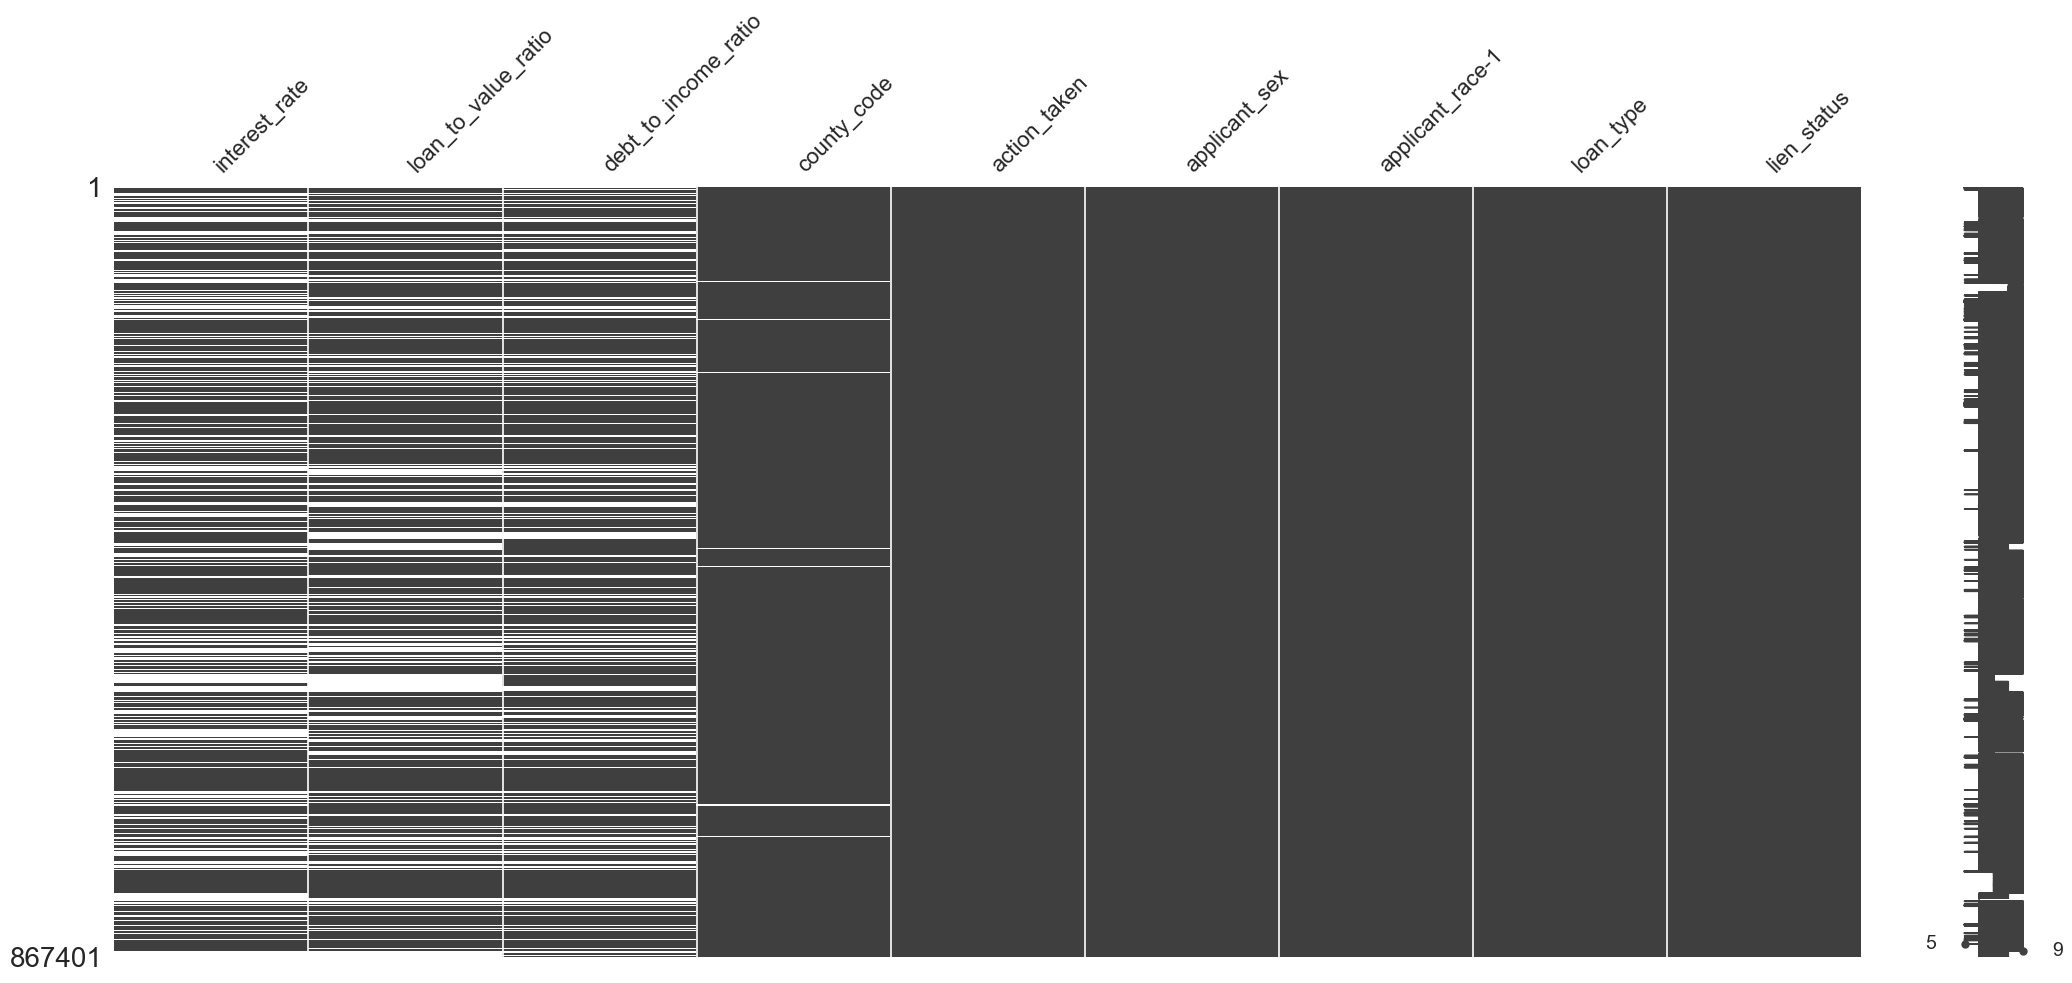

In [9]:
msno.matrix(HMDA_clean[HMDA_clean.isnull().sum().sort_values(ascending=False).head(15).index]);

In [10]:
HMDA_clean = HMDA_clean.dropna(subset="county_code")

In [11]:
HMDA_clean["county_code"] = HMDA_clean["county_code"].round(0).astype(int).astype(str)
HMDA_clean["applicant_race-1"] = HMDA_clean["applicant_race-1"].astype("category")
HMDA_clean["applicant_sex"] = HMDA_clean["applicant_sex"].astype("category")
HMDA_clean["lien_status"] = HMDA_clean["lien_status"].astype("category")
HMDA_clean["loan_type"] = HMDA_clean["loan_type"].astype("category")

HMDA_clean["loan_granted"] = np.where(HMDA_clean["action_taken"] == 1, 1, 0)
HMDA_clean["loan_granted"] = HMDA_clean["loan_granted"].astype("category")
HMDA_clean = HMDA_clean.drop(columns="action_taken")

In [12]:
HMDA_clean["interest_rate"] = HMDA_clean["interest_rate"].str.replace("Exempt", "0").astype(float)

HMDA_clean["debt_to_income_ratio"] = HMDA_clean["debt_to_income_ratio"].str.replace("Exempt", "0")
replacement_dict = {
    "36": "36%-41%",
    "37": "36%-41%",
    "38": "36%-41%",
    "39": "36%-41%",
    "40": "36%-41%",
    "41": "36%-41%",
    "42": "41%-45%",
    "43": "41%-45%",
    "44": "41%-45%",
    "45": "41%-45%",
    "46": "46%-49%",
    "47": "46%-49%",
    "48": "46%-49%",
    "49": "46%-49%"
}

HMDA_clean["debt_to_income_ratio"] = HMDA_clean["debt_to_income_ratio"].replace(replacement_dict, regex=True)
HMDA_clean["debt_to_income_ratio"] = HMDA_clean["debt_to_income_ratio"].replace(np.nan, "missing")
HMDA_clean["debt_to_income_ratio"] = HMDA_clean["debt_to_income_ratio"].astype("category")

HMDA_clean["loan_to_value_ratio"] = HMDA_clean["loan_to_value_ratio"].str.replace("Exempt", "0").astype(float)

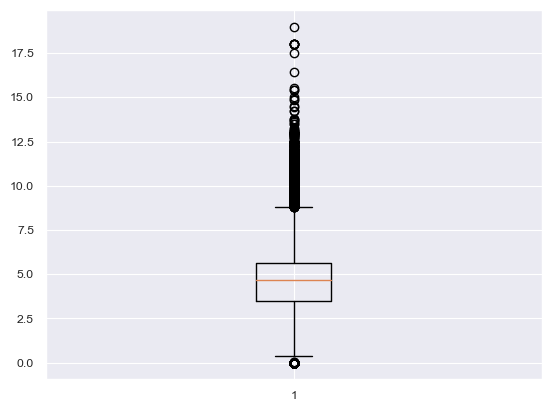

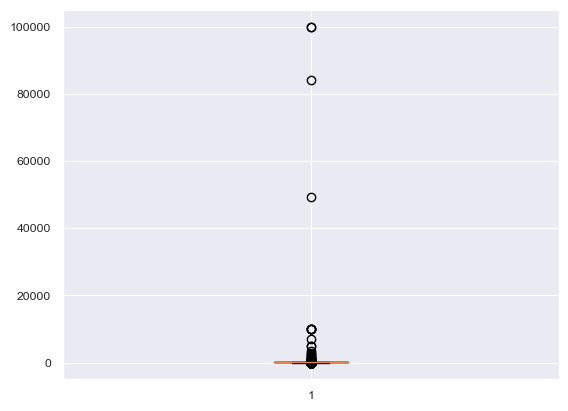

NormaltestResult(statistic=16332.56427742272, pvalue=0.0)
NormaltestResult(statistic=2240339.008360178, pvalue=0.0)
538732    18.99
163113    18.00
538727    17.99
538728    17.99
538729    17.99
538730    17.99
538733    17.99
619678    17.50
619681    16.45
157666    15.50
Name: interest_rate, dtype: float64
38911    0.0
38912    0.0
38913    0.0
38914    0.0
38915    0.0
38916    0.0
38917    0.0
38918    0.0
38919    0.0
38920    0.0
Name: interest_rate, dtype: float64
160152    99999.900
160406    99999.900
368621    84074.075
833855    49450.549
617406     9999.999
617430     9999.999
617569     9999.999
617631     9999.999
619390     9999.999
615987     6920.063
Name: loan_to_value_ratio, dtype: float64
38911    0.0
38912    0.0
38913    0.0
38914    0.0
38915    0.0
38916    0.0
38917    0.0
38918    0.0
38919    0.0
38920    0.0
Name: loan_to_value_ratio, dtype: float64


In [13]:
# analyse outliers in interest_rate and loan_to_value_ratio
plt.boxplot(HMDA_clean["interest_rate"].dropna())
plt.show()

plt.boxplot(HMDA_clean["loan_to_value_ratio"].dropna())
plt.show()

# normality test
print(normaltest(HMDA_clean["interest_rate"].dropna()))
print(normaltest(HMDA_clean["loan_to_value_ratio"].dropna()))

# print 5 highest and lowest values
print(HMDA_clean["interest_rate"].nlargest(10))
print(HMDA_clean["interest_rate"].nsmallest(10))
print(HMDA_clean["loan_to_value_ratio"].nlargest(10))
print(HMDA_clean["loan_to_value_ratio"].nsmallest(10))


In [14]:
HMDA_clean.drop(HMDA_clean[HMDA_clean["loan_to_value_ratio"] > 250].index, inplace=True)

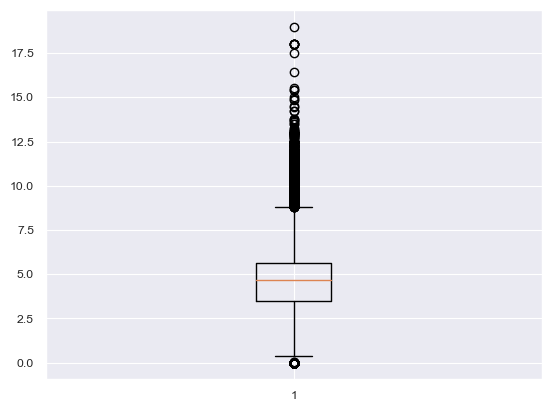

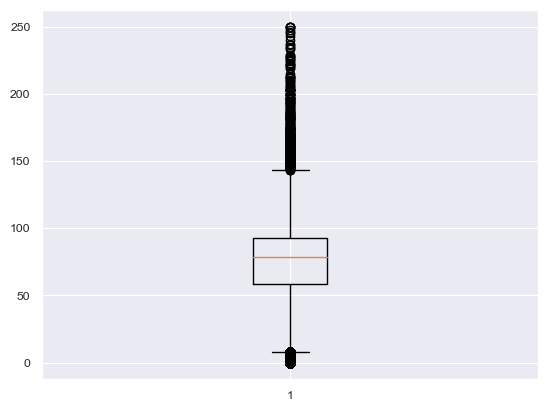

In [15]:
plt.boxplot(HMDA_clean["interest_rate"].dropna())
plt.show()

plt.boxplot(HMDA_clean["loan_to_value_ratio"].dropna())
plt.show()

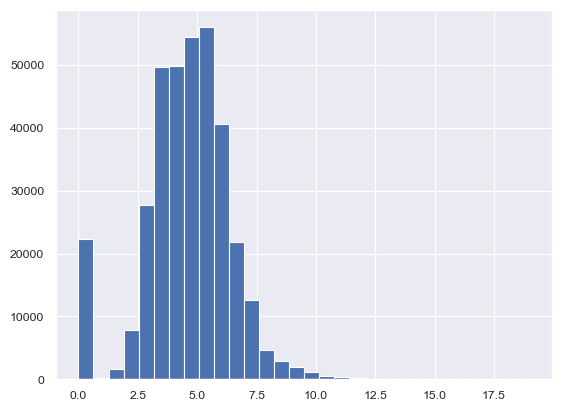

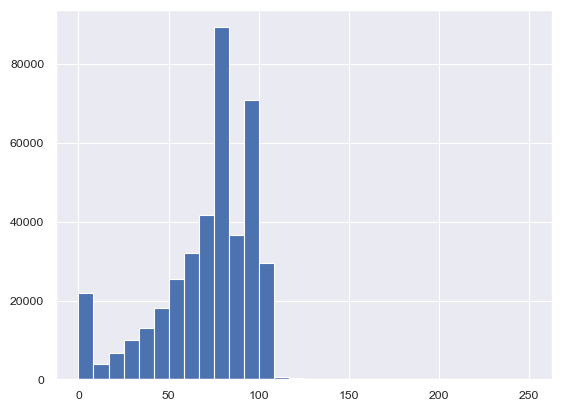

In [16]:
# print histograms
plt.hist(HMDA_clean["interest_rate"].dropna(), bins=30)
plt.show()

plt.hist(HMDA_clean["loan_to_value_ratio"].dropna(), bins=30)
plt.show()

In [17]:
imputer = IterativeImputer(max_iter=25, random_state=0) # KNNImputer(n_neighbors=2)
HMDA_clean[["interest_rate", "loan_to_value_ratio"]] = imputer.fit_transform(HMDA_clean[["interest_rate", "loan_to_value_ratio"]])

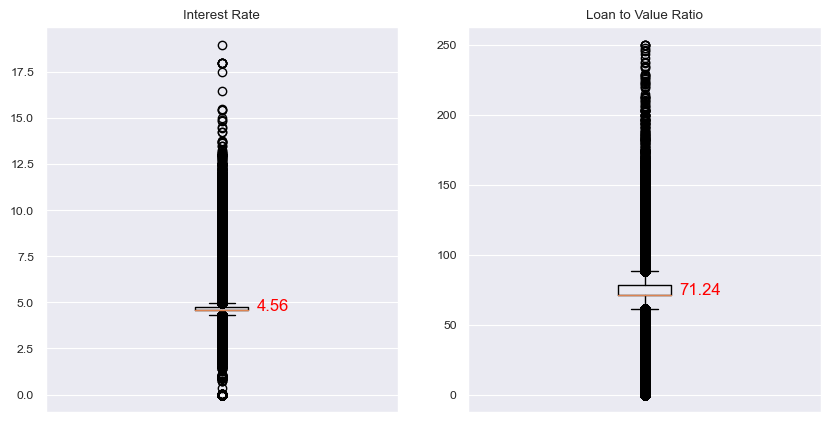

In [18]:
# boxplots for interest_rate and loan_to_value_ratio next to each other, including the mean value as a number
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(HMDA_clean["interest_rate"])
plt.title("Interest Rate")
plt.text(1.1, np.mean(HMDA_clean["interest_rate"]), f"{np.mean(HMDA_clean['interest_rate']):.2f}", fontsize=12, color="red")
plt.xticks([])
plt.subplot(1, 2, 2)
plt.boxplot(HMDA_clean["loan_to_value_ratio"])
plt.title("Loan to Value Ratio")
plt.text(1.1, np.mean(HMDA_clean["loan_to_value_ratio"]), f"{np.mean(HMDA_clean['loan_to_value_ratio']):.2f}", fontsize=12, color="red")
plt.xticks([])
plt.show()

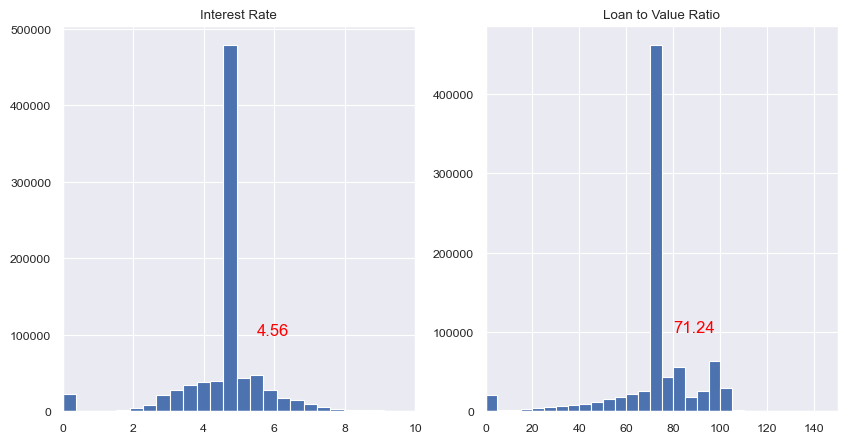

In [19]:
# histograms for interest_rate and loan_to_value_ratio next to each other, including the mean value as a number
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(HMDA_clean["interest_rate"].dropna(), bins=50)
plt.title("Interest Rate")
plt.text(5.5, 100000, f"{np.mean(HMDA_clean['interest_rate']):.2f}", fontsize=12, color="red")
plt.xlim(0, 10)
plt.subplot(1, 2, 2)
plt.hist(HMDA_clean["loan_to_value_ratio"].dropna(), bins=50)
plt.title("Loan to Value Ratio")
plt.text(80, 100000, f"{np.mean(HMDA_clean['loan_to_value_ratio']):.2f}", fontsize=12, color="red")
plt.xlim(0, 150)
plt.show()

In [20]:
'''
HMDA_clean_missing = HMDA_clean[HMDA_clean.debt_to_income_ratio == "missing"]
HMDA_clean_not_missing = HMDA_clean[HMDA_clean.debt_to_income_ratio != "missing"]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = HMDA_clean_not_missing.drop(columns="debt_to_income_ratio")
y = HMDA_clean_not_missing["debt_to_income_ratio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X, y)
'''

'\nHMDA_clean_missing = HMDA_clean[HMDA_clean.debt_to_income_ratio == "missing"]\nHMDA_clean_not_missing = HMDA_clean[HMDA_clean.debt_to_income_ratio != "missing"]\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\nX = HMDA_clean_not_missing.drop(columns="debt_to_income_ratio")\ny = HMDA_clean_not_missing["debt_to_income_ratio"]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nmodel = RandomForestClassifier()\nmodel.fit(X, y)\n'

In [21]:
# missing_data = HMDA_clean[HMDA_clean['debt_to_income_ratio'] == 'missing']
# X_missing = missing_data.drop(columns=['debt_to_income_ratio'])
# predicted_categories = model.predict(X_missing)

# HMDA_clean.loc[HMDA_clean['debt_to_income_ratio'] == 'missing', 'debt_to_income_ratio'] = predicted_categories

In [22]:
# y_pred = model.predict(X_test)
# accuracy_score(y_test, y_pred)

In [23]:
# pd.DataFrame(predicted_categories).value_counts()

In [32]:
# calculate the correlation between interest_rate and loan_to_value_ratio
HMDA_clean[["interest_rate", "loan_to_value_ratio"]].corr()

,interest_rate,loan_to_value_ratio
interest_rate,1.000000,0.542219
loan_to_value_ratio,0.542219,1.000000


In [24]:
HMDA_clean['debt_to_income_ratio'].value_counts()

debt_to_income_ratio
missing          225733
36%-41%          123537
20%-<30%          98651
30%-<36%-41%%     95240
41%-45%           92229
46%-49%           72298
50%-60%           54575
<20%              40270
>60%              35281
0                 20398
Name: count, dtype: int64

In [25]:
HMDA_clean["applicant_sex"] = HMDA_clean["applicant_sex"].replace({1: "Male", 2: "Female", 3: "Not provided", 4: "Not applicable", 6: "Both"})
HMDA_clean = HMDA_clean[(HMDA_clean["applicant_sex"] == "Male") | (HMDA_clean["applicant_sex"] == "Female")]
HMDA_clean["applicant_sex"] = HMDA_clean["applicant_sex"].cat.remove_unused_categories()

HMDA_clean["applicant_race-1"] = HMDA_clean["applicant_race-1"].replace({3: "Black or African American", 5: "White"})
HMDA_clean["loan_type"] = HMDA_clean["loan_type"].replace({1: "Conventional", 2: "FHA", 3: "VA", 4: "FSA/RHS"})
HMDA_clean["lien_status"] = HMDA_clean["lien_status"].replace({1: "First lien", 2: "Subordinate lien"})
HMDA_clean["loan_granted"] = HMDA_clean["loan_granted"].replace({1: "Granted", 0: "Not Granted"})

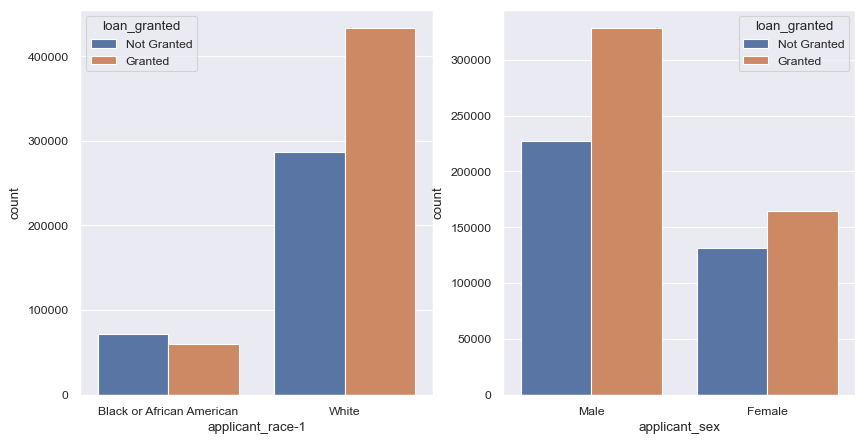

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=HMDA_clean, x = "applicant_race-1", hue = "loan_granted")
plt.subplot(1, 2, 2)
sns.countplot(data=HMDA_clean, x = "applicant_sex", hue = "loan_granted")
plt.show()

loan_granted            1.000000
applicant_race-1        0.109020
loan_type               0.024597
lien_status            -0.005129
applicant_sex          -0.034452
debt_to_income_ratio   -0.608669
dtype: float64


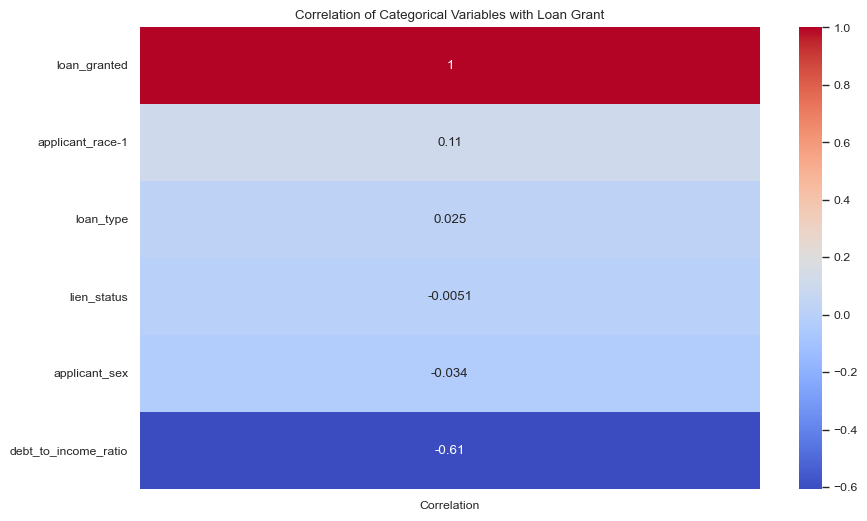

In [27]:
print(HMDA_clean.select_dtypes(include = "category").apply(lambda x: x.cat.codes).corrwith(HMDA_clean["loan_granted"].cat.codes).sort_values(ascending = False))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(HMDA_clean.select_dtypes(include = "category").apply(lambda x: x.cat.codes).corrwith(HMDA_clean["loan_granted"].cat.codes).sort_values(ascending = False).to_frame("Correlation"), annot = True, cmap = "coolwarm", ax = ax)
ax.set_title("Correlation of Categorical Variables with Loan Grant")
plt.show()

In [28]:
probabilities = HMDA_clean.groupby(["applicant_race-1", "applicant_sex"]).apply(lambda x: x["loan_granted"].value_counts(normalize=True)).unstack().reset_index()
print(probabilities)

loan_granted           applicant_race-1 applicant_sex  Not Granted   Granted
0             Black or African American          Male     0.535701  0.464299
1             Black or African American        Female     0.558511  0.441489
2                                 White          Male     0.391086  0.608914
3                                 White        Female     0.412471  0.587529


In [29]:
sex_table = pd.crosstab(HMDA_clean['applicant_sex'], HMDA_clean['loan_granted'])
race_table = pd.crosstab(HMDA_clean['applicant_race-1'], HMDA_clean['loan_granted'])

chi2_sex, p_value_sex, dof_sex, expected_sex = chi2_contingency(sex_table)
chi2_race, p_value_race, dof_race, expected_race = chi2_contingency(race_table)

print("Chi-square statistic Sex:", chi2_sex, "\n", "P-value Sex:", p_value_sex, "\n", "Degrees of Freedom Sex:", dof_sex)
print("Chi-square statistic Race", chi2_race, "\n", "P-value Race:", p_value_race, "\n", "Degrees of Freedom Race:", dof_race)

Chi-square statistic Sex: 1011.0781033669084 
 P-value Sex: 7.019379081265504e-222 
 Degrees of Freedom Sex: 1
Chi-square statistic Race 10124.874754220345 
 P-value Race: 0.0 
 Degrees of Freedom Race: 1


In [30]:
HMDA_clean_final = HMDA_clean.copy()
# HMDA_clean_final[["interest_rate", "loan_to_value_ratio"]] = (HMDA_clean[["interest_rate", "loan_to_value_ratio"]] - HMDA_clean[["interest_rate", "loan_to_value_ratio"]].mean()) / HMDA_clean[["interest_rate", "loan_to_value_ratio"]].std()
HMDA_clean_final.to_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/HMDA_clean_final.pkl")

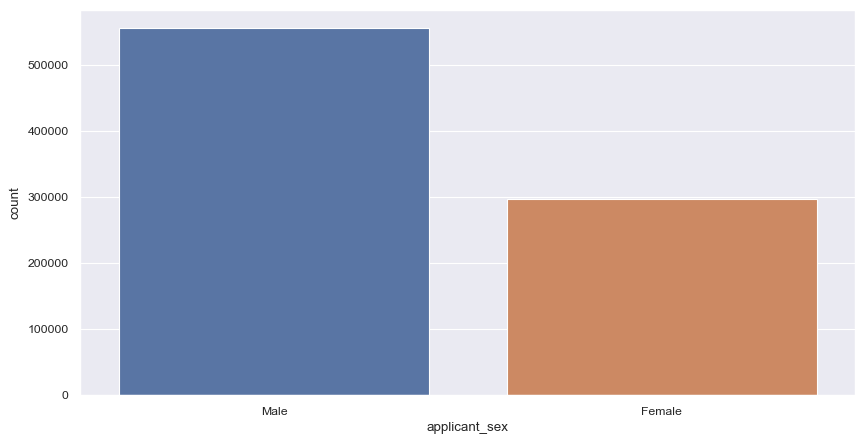

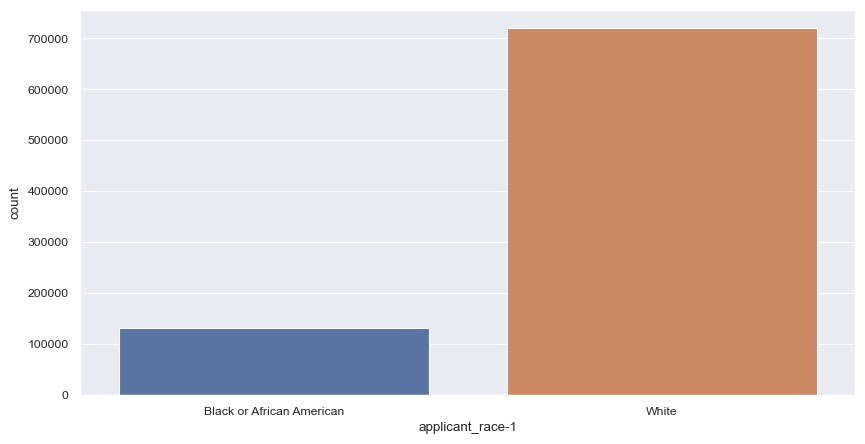

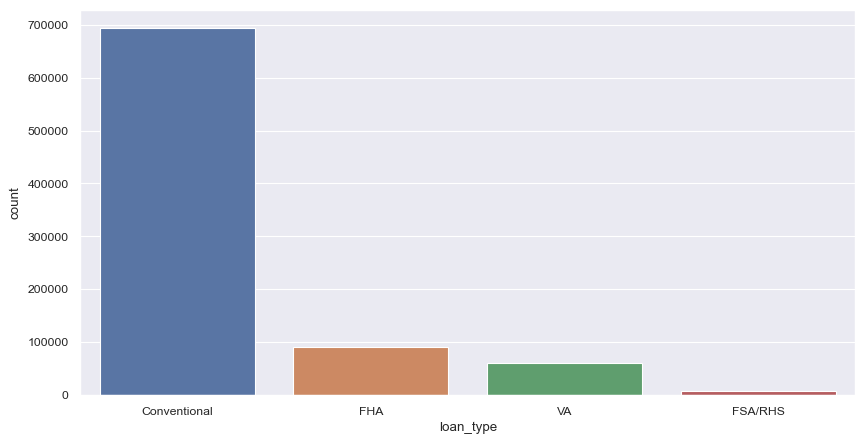

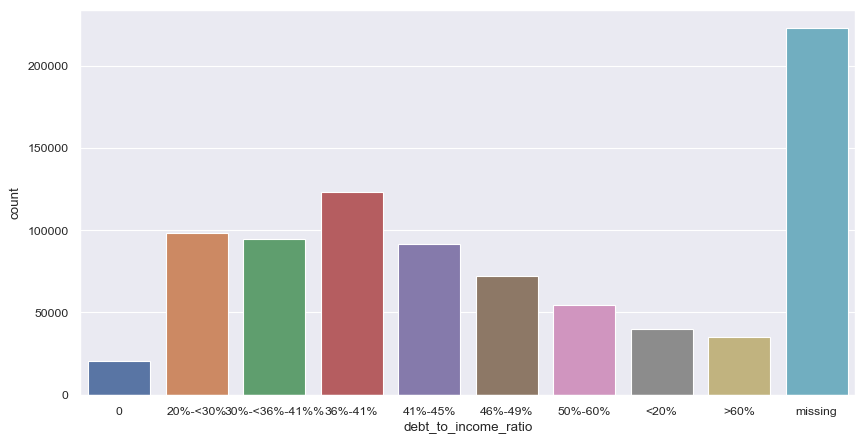

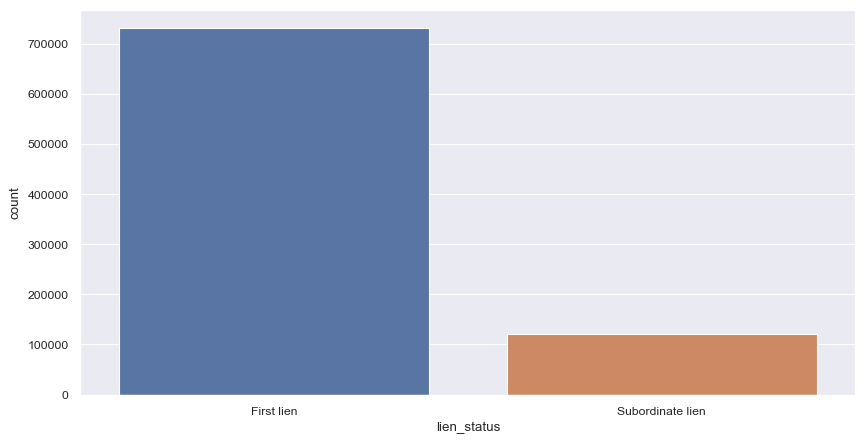

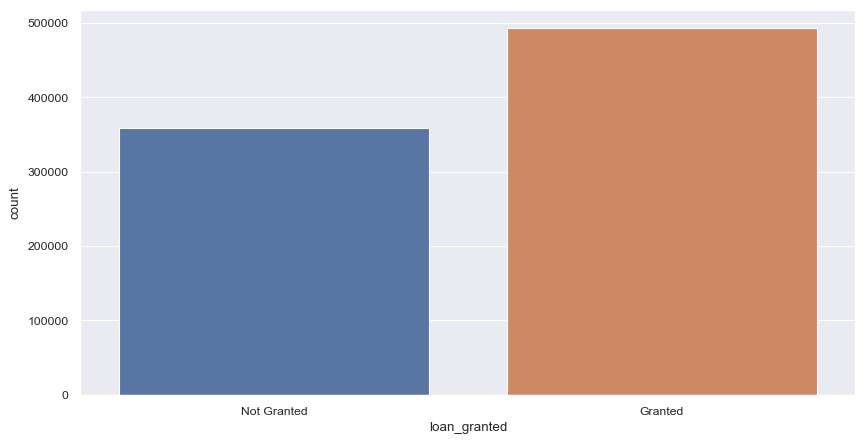

In [31]:
# plot the occurences of the categorical variables
for item in HMDA_clean_final.select_dtypes(include="category").columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=HMDA_clean_final, x=item)
    plt.show()